In [8]:
import numpy as np
import cv2 as cv
import glob

# Termination criteria for corner refinement
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points (real-world 3D points)
objp = np.zeros((6 * 7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in the image plane

# Make sure you specify the correct path pattern (e.g., '.jpg' or '.png')
images = glob.glob('chessboard/*.jpg')  # Example for jpg images in 'chessboard' folder

for fname in images:
    img = cv.imread(fname)
    
    if img is None:
        print(f"Error loading image: {fname}")
        continue

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv.findChessboardCorners(gray, (7, 6), None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        
        # Refine corner positions
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        
        imgpoints.append(corners2)  # Append refined corners
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        
        # Show the image with detected corners
        cv.imshow('Chessboard Corners', img)
        cv.waitKey(500)  # Adjust the time (in milliseconds) the window stays open

# Perform camera calibration after collecting all image points and object points
if len(objpoints) > 0 and len(imgpoints) > 0:
    h, w = img.shape[:2]
    ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera(
        objpoints,  # 3D points
        imgpoints,  # 2D points
        (w, h),     # Image size (width, height)
        None,        # No initial camera matrix
        None         # No initial distortion coefficients
    )

    if ret:
        print("Camera matrix:")
        print(matrix)
        print("Distortion coefficients:")
        print(distortion)
        print("Rotation vectors:")
        print(r_vecs)
        print("Translation vectors:")
        print(t_vecs)
    else:
        print("Calibration failed.")
else:
    print("Insufficient data for calibration.")

cv.destroyAllWindows()


Camera matrix:
[[ 90.89828916   0.         153.99473075]
 [  0.          90.93734987 201.26933859]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[ 0.02662832 -0.00924734  0.00159691 -0.00178068  0.00077718]]
Rotation vectors:
(array([[-7.67711325e-04],
       [-2.89077694e-02],
       [-3.13782339e+00]]),)
Translation vectors:
(array([[3.00152476],
       [1.62459125],
       [3.24654733]]),)


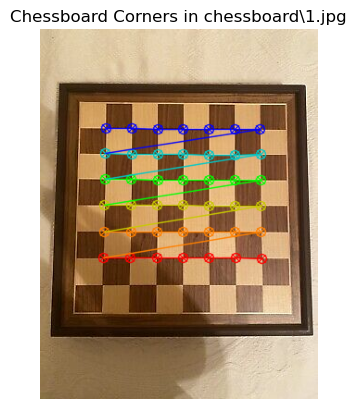

Camera matrix:
[[ 90.89828916   0.         153.99473075]
 [  0.          90.93734987 201.26933859]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[ 0.02662832 -0.00924734  0.00159691 -0.00178068  0.00077718]]
Rotation vectors:
(array([[-7.67711325e-04],
       [-2.89077694e-02],
       [-3.13782339e+00]]),)
Translation vectors:
(array([[3.00152476],
       [1.62459125],
       [3.24654733]]),)


In [9]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# Termination criteria for corner refinement
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points (real-world 3D points)
objp = np.zeros((6 * 7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in the image plane

# Make sure you specify the correct path pattern (e.g., '.jpg' or '.png')
images = glob.glob('chessboard/*.jpg')  # Example for jpg images in 'chessboard' folder

for fname in images:
    img = cv.imread(fname)
    
    if img is None:
        print(f"Error loading image: {fname}")
        continue

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv.findChessboardCorners(gray, (7, 6), None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        
        # Refine corner positions
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        
        imgpoints.append(corners2)  # Append refined corners
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        
        # Convert BGR image to RGB for matplotlib display
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Show the image with detected corners using matplotlib
        plt.imshow(img_rgb)
        plt.title(f'Chessboard Corners in {fname}')
        plt.axis('off')  # Turn off axis labels
        plt.show()
        plt.pause(0.5)  # Adjust the time (in seconds) the window stays open

# Perform camera calibration after collecting all image points and object points
if len(objpoints) > 0 and len(imgpoints) > 0:
    h, w = img.shape[:2]
    ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera(
        objpoints,  # 3D points
        imgpoints,  # 2D points
        (w, h),     # Image size (width, height)
        None,        # No initial camera matrix
        None         # No initial distortion coefficients
    )

    if ret:
        print("Camera matrix:")
        print(matrix)
        print("Distortion coefficients:")
        print(distortion)
        print("Rotation vectors:")
        print(r_vecs)
        print("Translation vectors:")
        print(t_vecs)
    else:
        print("Calibration failed.")
else:
    print("Insufficient data for calibration.")
